In [1]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [19]:
plate_image = cv2.imread("../../DATA/car_plate.jpg")


In [20]:
def display(img):
    cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(7,7))
    plt.imshow(img)

In [21]:
plate_cascade = cv2.CascadeClassifier("../../DATA/haarcascades/haarcascade_russian_plate_number.xml")

In [32]:
def detect_plate(img):
    plate_img = img.copy()
    
    plat_rect = plate_cascade.detectMultiScale(plate_img,scaleFactor = 1.2,minNeighbors =5)
    
    for (x,y,w,h) in plat_rect:
        cv2.rectangle(plate_img,(x,y),(x+w,y+h),(0,0,255),8)
    

    return plate_img

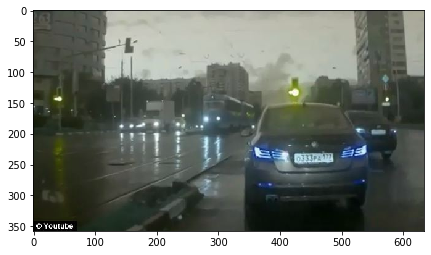

In [33]:
display(plate_image)

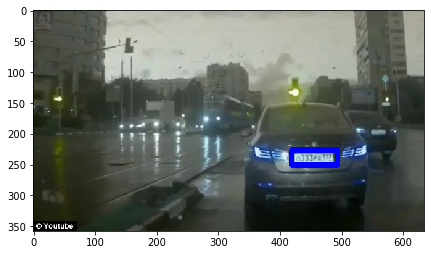

In [34]:
result = detect_plate(plate_image)
display(result)

## You can check blur part with the help of stackoverflow

In [35]:
def detect_and_blur_plate(img):
    plate_img = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.2, minNeighbors=5)
    for (x,y,w,h) in plate_rects:
        print(x,y,w,h)
        plate = plate_img[y:y+h, x:x+w]
        plate = cv2.medianBlur(plate, 15)
        plate_img[y:y+h, x:x+w] = plate
    return plate_img

419 226 74 25


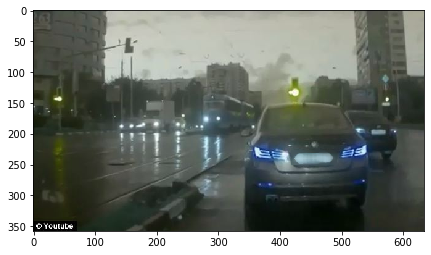

In [36]:
result = detect_and_blur_plate(plate_image)
display(result)